# Part 1 - Preprocessing
## Section 0 - Loading the dataset

In [1]:
import pandas as pd
df = pd.read_csv("IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Section 1 - The Importance of Missing Values 

### Q1. Columns with at least one NaN record


In [2]:
df.isna().any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

### Q2. Filling the missing values with mean

In [3]:
# Columns `Revenue (Millions)` & `Metascore` have at least one NaN value.
chosen_column = 'Revenue (Millions)'
df[chosen_column].fillna((df[chosen_column].mean()), inplace=True)

# Checking whether all NaN records are replaced
df[chosen_column].isna().any()

False

## Section 2 - Data Modification

### Q3. Correcting the rank column

In [4]:
# The argument `method='min'` is speicifed to assign the
#  lowest rank possible to all the records with the same rating.
df['Rank'] = df['Rating'].rank(method='min', ascending=False).astype(int)

## Section 3. Normalization

### Q4. Normalizing a column with sklearn.preprocessing.StandardScaler

In [5]:
# Replacing NaN values
df['Metascore'].fillna((df['Metascore'].mean()), inplace=True)

# Calculating mean & variance before normalization
mean_before_normalization = df['Metascore'].mean()
variance_before_normalization = df['Metascore'].var()

# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Metascore'] = scaler.fit_transform(df[['Metascore']])

# Calculating mean & variance after normalization
mean_after_normalization = df['Metascore'].mean()
variance_after_normalization = df['Metascore'].var()

# Printing the results
print(f'Column `Metascore`: ')
print(f'Before Normalization > mean: {mean_before_normalization}, variance: {variance_before_normalization}')
print(f'After  Normalization > mean: {mean_after_normalization}, variance: {variance_after_normalization}')

Column `Metascore`: 
Before Normalization > mean: 58.985042735042626, variance: 276.7185091073976
After  Normalization > mean: 2.0605739337042906e-16, variance: 1.0010010010010026


## Data Inspection

### Movies that `Christopher Nolan` directed

In [6]:
# assuming column `Director` contains a single name 
df.loc[df['Director'] == 'Christopher Nolan']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
36,4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,0.903072
54,1,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,1.384230
64,7,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,0.421913
80,2,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,0.903072
124,7,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,1.143651


### Movies with a rating between 8.4 and 8.6

In [7]:
df.loc[(df['Rating'] > 8.4) & (df['Rating'] < 8.6)].head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
64,7,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,0.421913
99,7,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,1.564665
124,7,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,1.143651
133,7,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,1.745099
476,7,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,1.805244


<AxesSubplot:xlabel='Rating'>

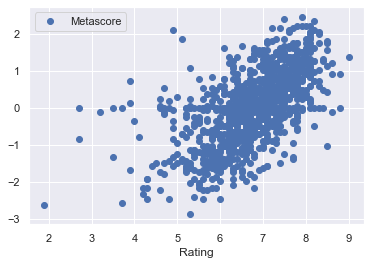

In [8]:
import seaborn as sns
sns.set()
df.plot(x='Rating', y='Metascore', style=['o'])

### Movies that were created before 2013, with a running time from 85 to 100 minutes

In [9]:
df.loc[(df['Year'] < 2013) & (df['Runtime (Minutes)'] > 85) & (df['Runtime (Minutes)'] < 100)].head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
141,723,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,-0.179535
155,969,Aliens vs Predator - Requiem,"Action,Horror,Sci-Fi",Warring alien and predator races descend on a ...,Colin Strause,"Reiko Aylesworth, Steven Pasquale,Shareeka Epp...",2007,94,4.7,97618,41.80,-1.803445
211,926,Spring Breakers,Drama,Four college girls hold up a restaurant in ord...,Harmony Korine,"Vanessa Hudgens, Selena Gomez, Ashley Benson,R...",2012,94,5.3,114290,14.12,0.241479
251,264,Kynodontas,"Drama,Thriller","Three teenagers live isolated, without leaving...",Yorgos Lanthimos,"Christos Stergioglou, Michele Valley, Angeliki...",2009,94,7.3,50946,0.11,0.842927
302,400,The Cabin in the Woods,Horror,"Five friends go for a break at a remote cabin,...",Drew Goddard,"Kristen Connolly, Chris Hemsworth, Anna Hutchi...",2012,95,7.0,295554,42.04,0.782782


# Part 2 - Regression

## Linear regression

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Loading the dataset
df = pd.read_csv("GOOGL.csv")

# Converting the date column to integer values
df["DayNumber"] = df["Date"].apply(lambda x: pd.to_datetime(x).toordinal())
df['DayNumber'] = df['DayNumber'].sub(df['DayNumber'].min())

# Spliting the dataset to train & test
train_df = df.iloc[:-10]
test_df = df[-10:]
train_x = train_df[["DayNumber"]]
train_y = train_df[["Open"]]
test_x = test_df[["DayNumber"]]
test_y = test_df[["Open"]]
df.head()

,Date,Open,High,Low,Open.1,Volume,Name,DayNumber
0,1/3/2006,211.47,218.05,209.32,217.83,13137450,GOOGL,0
1,1/4/2006,222.17,224.70,220.09,222.84,15292353,GOOGL,1
2,1/5/2006,223.22,226.00,220.97,225.85,10815661,GOOGL,2
3,1/6/2006,228.66,235.49,226.85,233.06,17759521,GOOGL,3
4,1/9/2006,233.44,236.94,230.70,233.68,12795837,GOOGL,6


In [11]:
# Fit the regression equation
reg = LinearRegression()
reg.fit(train_x, train_y)

# predict for the test data
pred_y = reg.predict(test_x)

# calculate the error
for i in range(10):
    print(f"#{i}")
    print(f"calculated value: {pred_y[i][0]}\n"
            f"actual value: {test_y.iloc[i].values[0]}\n"
            f"error: {pred_y[i][0] - test_y.iloc[i].values[0]}\n")
    
    
mse = mean_squared_error(test_y, pred_y)
mae = mean_absolute_error(test_y, pred_y)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

#0
calculated value: 790.0853580458806
actual value: 1063.78
error: -273.69464195411933

#1
calculated value: 790.5859753614361
actual value: 1076.45
error: -285.86402463856393

#2
calculated value: 790.7528477999546
actual value: 1083.02
error: -292.2671522000454

#3
calculated value: 790.9197202384731
actual value: 1080.92
error: -290.00027976152694

#4
calculated value: 791.0865926769916
actual value: 1075.39
error: -284.3034073230085

#5
calculated value: 791.25346511551
actual value: 1070.0
error: -278.74653488448996

#6
calculated value: 791.9209548695841
actual value: 1068.64
error: -276.719045130416

#7
calculated value: 792.0878273081025
actual value: 1066.6
error: -274.5121726918974

#8
calculated value: 792.254699746621
actual value: 1062.25
error: -269.995300253379

#9
calculated value: 792.4215721851396
actual value: 1055.49
error: -263.06842781486046

Mean Squared Error: 77870.81290252322
Mean Absolute Error: 278.9170986652307


## Quadratic Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression can accept multiple features and put them in the equation ax + by + cz + ... = f
#  Note that all features are in linear form (first degree)
# To solve for the quadratic equation (ax**2 + bx + c = f), we introduce a new feature y, which is equal to x**2
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(train_x, train_y)

# predict for the test data
pred_y = model.predict(test_x)

# calculate the errors
for i in range(10):
    error = pred_y[i][0] - test_y.iloc[i].values[0]
    print(f"#{i}")
    print(f"calculated value: {pred_y[i][0]}\n"
            f"actual value: {test_y.iloc[i].values[0]}\n"
            f"error: {error}\n")
    
mse = mean_squared_error(test_y, pred_y)
mae = mean_absolute_error(test_y, pred_y)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

#0
calculated value: 992.5650195367242
actual value: 1063.78
error: -71.21498046327577

#1
calculated value: 993.902468290542
actual value: 1076.45
error: -82.5475317094581

#2
calculated value: 994.348540102622
actual value: 1083.02
error: -88.67145989737799

#3
calculated value: 994.7947396951058
actual value: 1080.92
error: -86.12526030489425

#4
calculated value: 995.2410670679935
actual value: 1075.39
error: -80.14893293200657

#5
calculated value: 995.687522221285
actual value: 1070.0
error: -74.31247777871499

#6
calculated value: 997.4746206384884
actual value: 1068.64
error: -71.16537936151167

#7
calculated value: 997.9217146937987
actual value: 1066.6
error: -68.67828530620125

#8
calculated value: 998.3689365295127
actual value: 1062.25
error: -63.881063470487334

#9
calculated value: 998.8162861456306
actual value: 1055.49
error: -56.67371385436945

Mean Squared Error: 5618.597070481336
Mean Absolute Error: 74.34190850782974


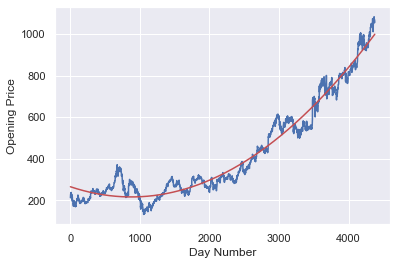

In [13]:
# The mean squared for the quadratic regression is by far lower, therefor we plot the second model.
x = df['DayNumber']
y = df['Open']
y_predict =  model.predict(df[['DayNumber']])
plt.plot(x, y, "b")
plt.plot(x, y_predict, color="r")
plt.xlabel("Day Number")
plt.ylabel("Opening Price")
plt.show()